# Интерпретация. Практическая работа

## Цель практической работы

Научиться интерпретировать модели кластеризации.

## Что входит в практическую работу


1. Загрузить данные и провести разведочный анализ.
2. Предположить оптимальное количество кластеров.
3. Очистить и подготовить данные для использования в моделях машинного обучения.
4. Построить модель кластеризации с помощью библиотеки Scikit-learn и вычислить оптимальное количество кластеров.
5. Визуализировать результаты кластеризации.
6. Интерпретировать полученные результаты.
7. Подкрепить выводы интерпретации визуализациями.

## Что оценивается 

* Выполнены все этапы работы.
* Сделаны выводы по результатам разведочного анализа данных.
* Выполнена и обоснована подготовка данных.
* Выбор количества кластеров обоснован и подкреплён визуализацией. 
* Выбор гиперпараметров метода понижения размерности обоснован.
* Интерпретация кластеров подкреплена расчётами и визуализацией. 



# Задача

У вас имеется некоторый набор данных `marketing_campaign.csv` о покупателях супермаркета.

* ID — уникальный идентификатор клиента.
* Year_Birth — год рождения клиента.
* Dt_Customer — дата регистрации клиента на сайте.
* Recency — количество дней с момента последней покупки клиента.
* MntFruits — сумма, потраченная на фрукты за последние два года.
* MntMeatProducts — сумма, потраченная на мясо за последние два года.
* MntFishProducts — сумма, потраченная на рыбу за последние два года.
* MntSweetProducts — сумма, потраченная на сладости за последние два года.
* NumWebPurchases — количество покупок, совершённых через сайт.
* NumStorePurchases — количество покупок, совершённых непосредственно в магазинах.
* Response: 1, если клиент участвовал в последней рекламной кампании, 0 — в противном случае.

Решите задачу кластеризации покупателей, чтобы в дальнейшем планировать маркетинговые акции для каждой группы покупателей. Подготовьте результаты своей работы для демонстрации заказчику, не погружённому в машинное обучение.

# Задание 1

Загрузите датасет и выполните разведочный анализ данных. Сделайте выводы о найденных закономерностях, особенностях и других свойствах данных, которые вы обнаружите.

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [32]:
df = pd.read_csv('14.4 marketing campaign.csv')

In [33]:
df.head()

,ID,Year_Birth,Dt_Customer,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response
0,5524,1957,04-09-2012,58,88,546,172,88,8,4,1
1,2174,1954,08-03-2014,38,1,6,2,1,1,2,0
2,4141,1965,21-08-2013,26,49,127,111,21,8,10,0
3,6182,1984,10-02-2014,26,4,20,10,3,2,4,0
4,5324,1981,19-01-2014,94,43,118,46,27,5,6,0


In [34]:
# пропусков нет, уже приятно
sum(df.isna().sum())

0

In [35]:
col_names = dict()
for col in df.columns:
    col_names[col] = col.lower()[3:] if 'mnt' in col.lower() else (col.lower()[3:] if 'num' in col.lower() else  col.lower())
col_names

{'ID': 'id',
 'Year_Birth': 'year_birth',
 'Dt_Customer': 'dt_customer',
 'Recency': 'recency',
 'MntFruits': 'fruits',
 'MntMeatProducts': 'meatproducts',
 'MntFishProducts': 'fishproducts',
 'MntSweetProducts': 'sweetproducts',
 'NumWebPurchases': 'webpurchases',
 'NumStorePurchases': 'storepurchases',
 'Response': 'response'}

In [36]:
df = df.rename(columns=col_names)

In [37]:
# df = df.drop('id', axis=1)

In [38]:
for col in df.columns:

    if col == 'id':
        continue
    if col == 'dt_customer':
        continue
    res = stats.shapiro(df[col])
#     print(res[1] > 0.05)
    print(col,' - not normal dist' if res.pvalue <= 0.05  else '- normal dist')

year_birth  - not normal dist
recency  - not normal dist
fruits  - not normal dist
meatproducts  - not normal dist
fishproducts  - not normal dist
sweetproducts  - not normal dist
webpurchases  - not normal dist
storepurchases  - not normal dist
response  - not normal dist


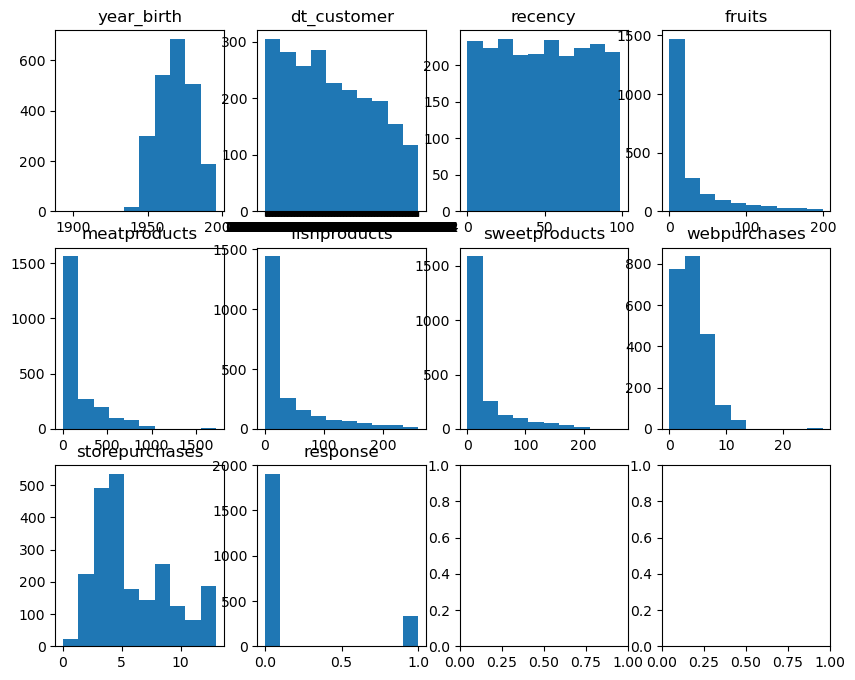

In [39]:
ax = plt.subplots(3, (len(df.columns) // 3 + 1), figsize=(10,8), )[1]
i = 0
k = 0
counter = 0
for col in df.columns:
    if counter == 4:
        i +=1
        counter = 0
        k = 0
    ax[i][k].hist(df[col])
    ax[i][k].set_title(f'{col}')#, rotation=30)
    k += 1
    counter += 1


In [101]:
# посмотрим на выбросы

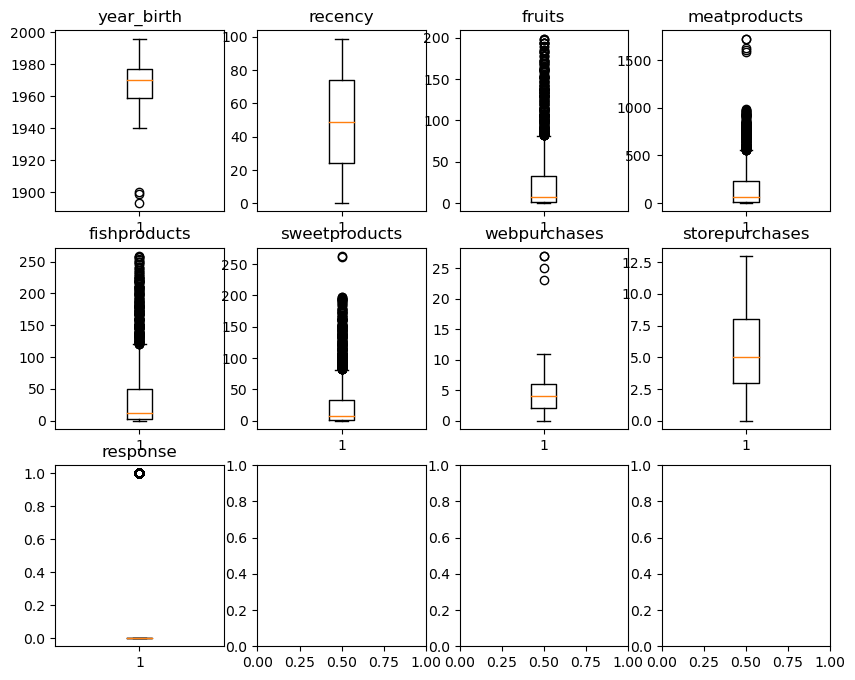

In [41]:
ax = plt.subplots(3, (len(df.columns) // 3 + 1), figsize=(10,8), )[1]
i = 0
k = 0
counter = 0
for col in df.columns:
    if  col == 'dt_customer':
        continue
    if counter == 4:
        i +=1
        counter = 0
        k = 0
    ax[i][k].boxplot(df[col])
    ax[i][k].set_title(f'{col}')#, rotation=30)
    k += 1
    counter += 1

In [104]:
# выбросов немало, кажется
# перетащим пару полезных функций из прошлых модулей

In [42]:
def calculate_iqr_boundaries(series):
    q25 = series.quantile(0.25)
    q75 = series.quantile(0.75)
    iqr = q75 - q25

    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    return boundaries

In [43]:
def bounds_f(x_train):
    bounds = []
    bounds_d = dict()
    for col in x_train.columns:
        if col == 'gender':
            continue
    #     iter_name = f'{col}'
        exec(f'{col}_boundaries = calculate_iqr_boundaries(x_train.{col})')
        exec(f'bounds.append(({col}_boundaries))')
    for i in range(len(x_train.columns)):
        if x_train.columns[i] == 'gender':
            continue
        bounds_d[x_train.columns[i]] = bounds[i]
    return bounds_d


In [103]:
# ну и попробуем заставить машину сделать все за нас, авось найдется закономерность 
# хоть где то явная и с этого можно будет хотя бы начать

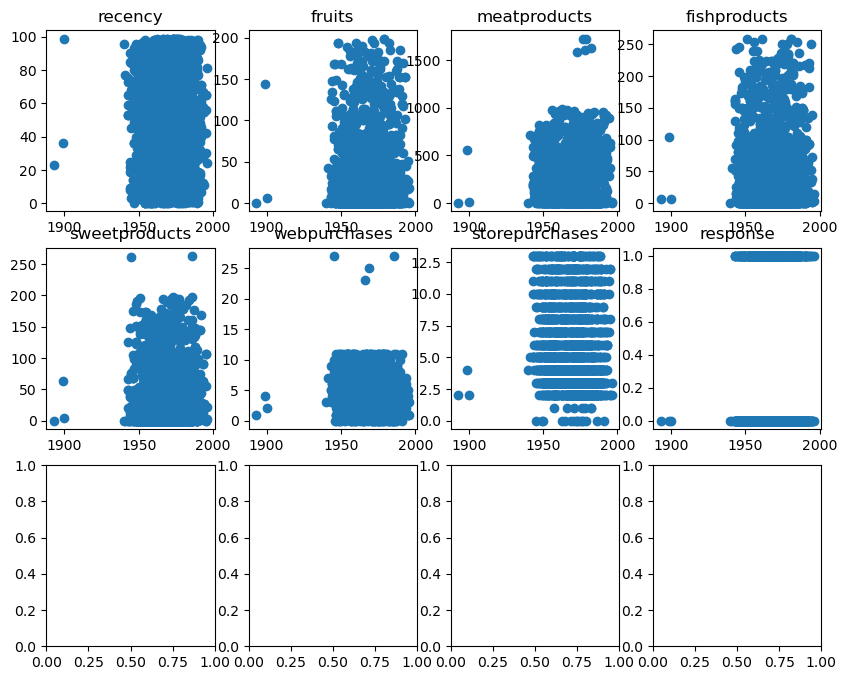

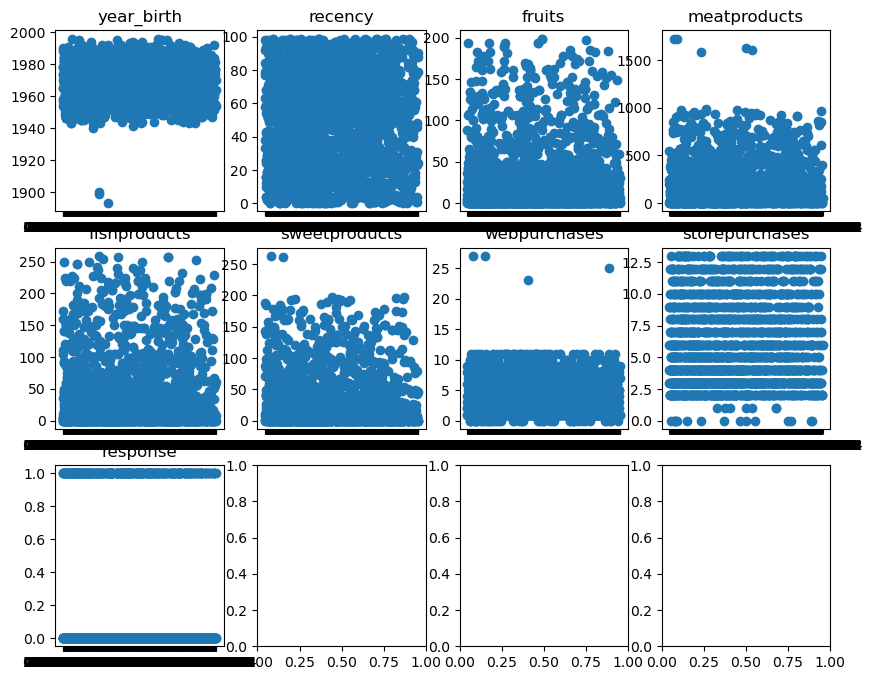

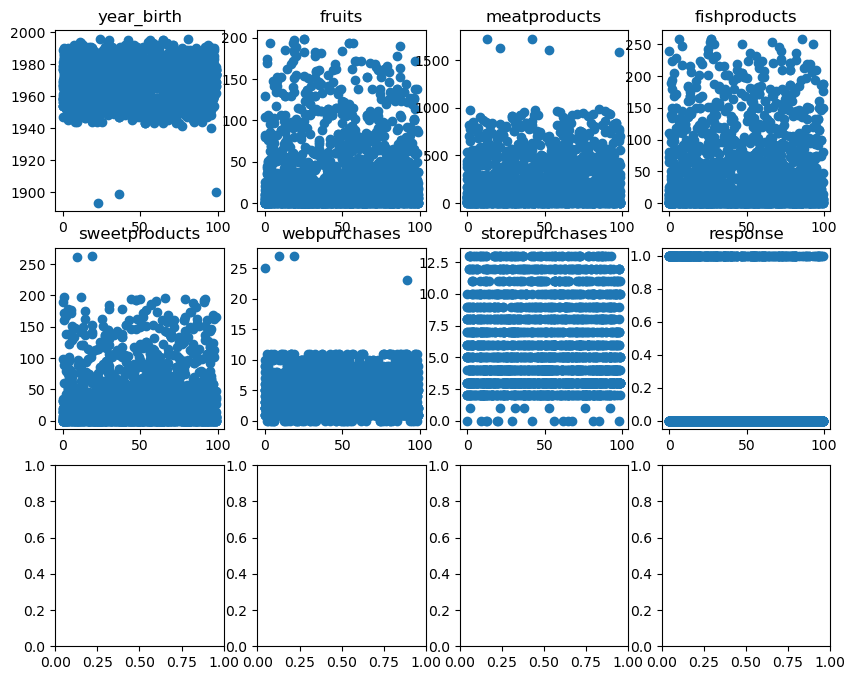

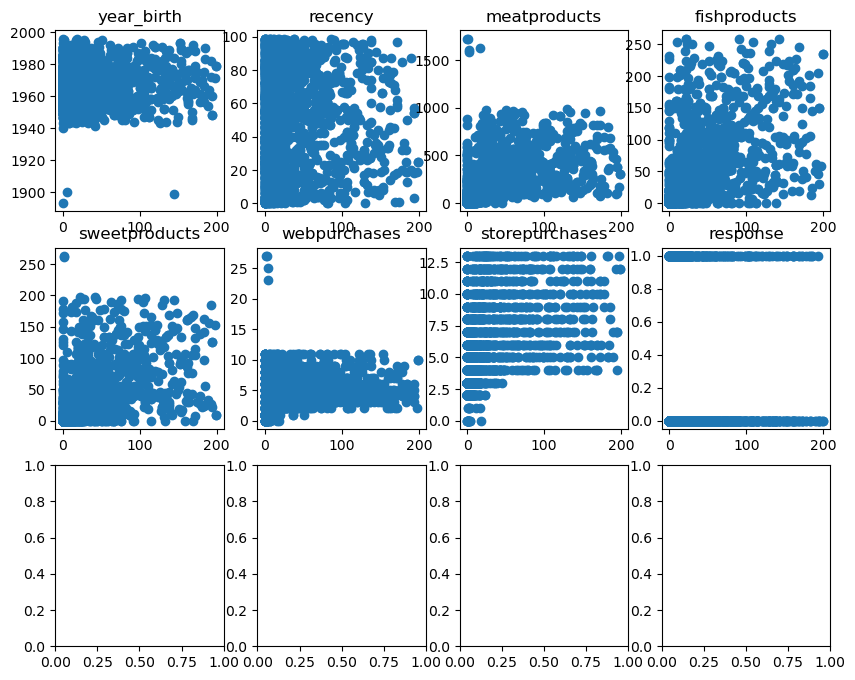

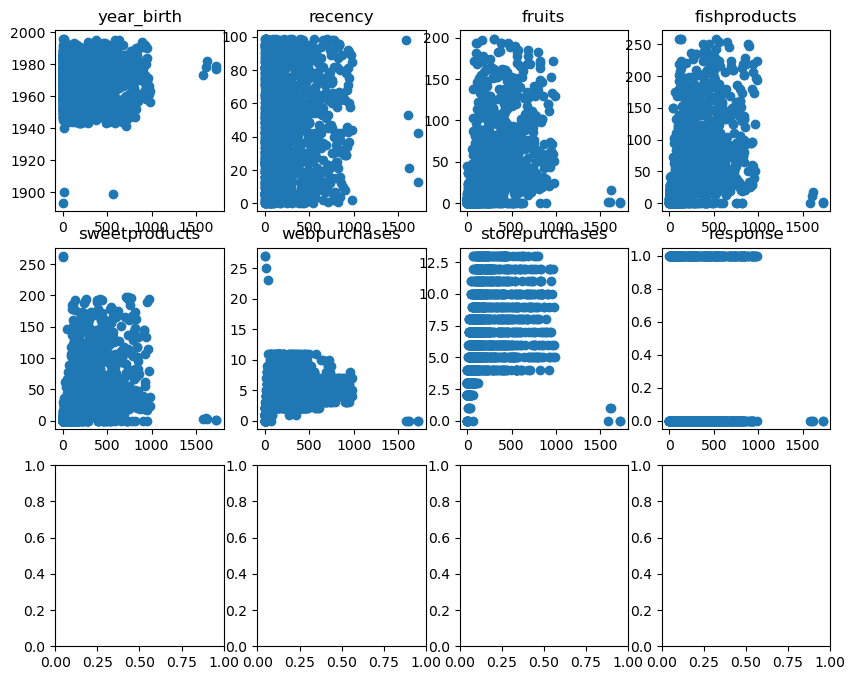

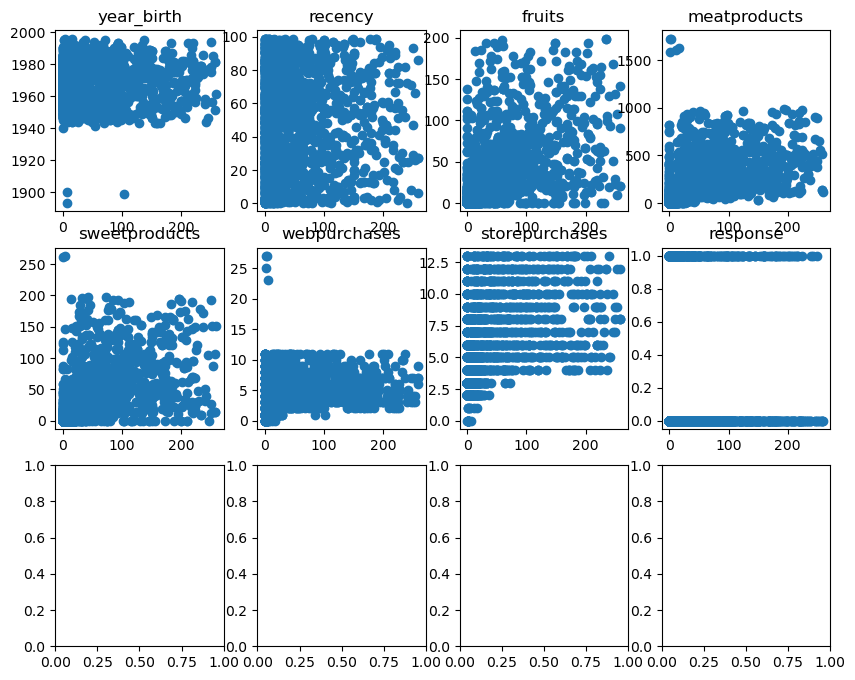

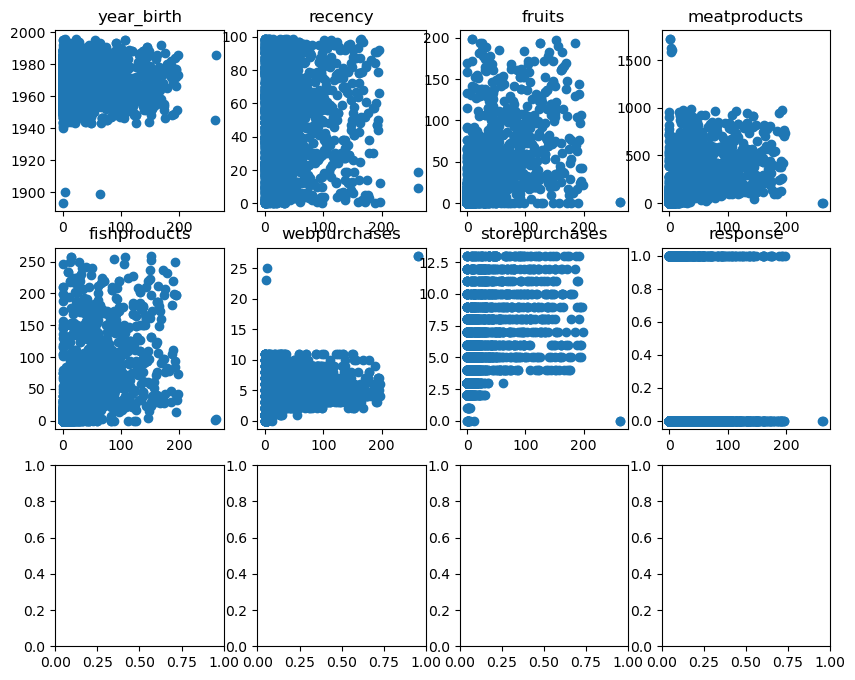

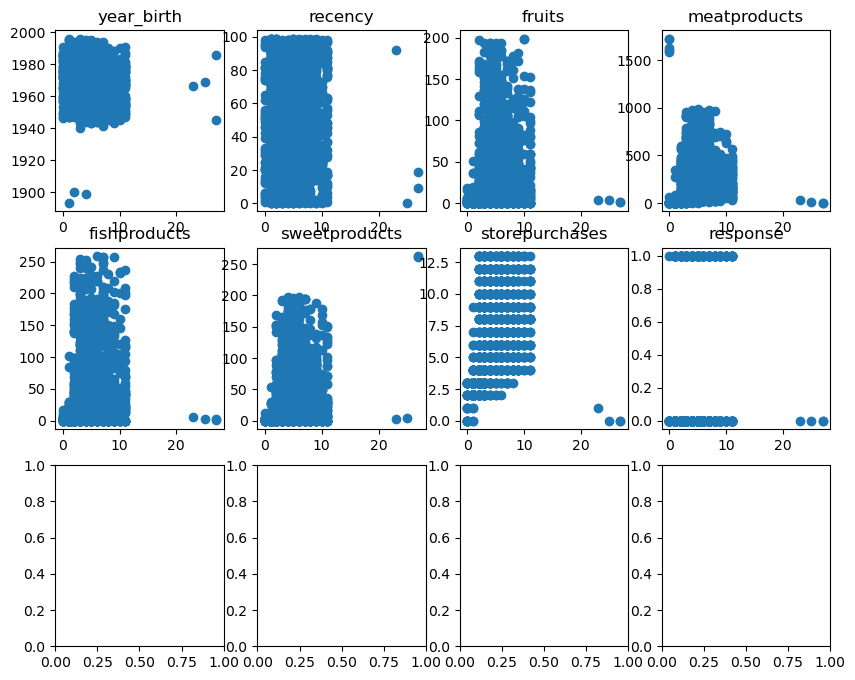

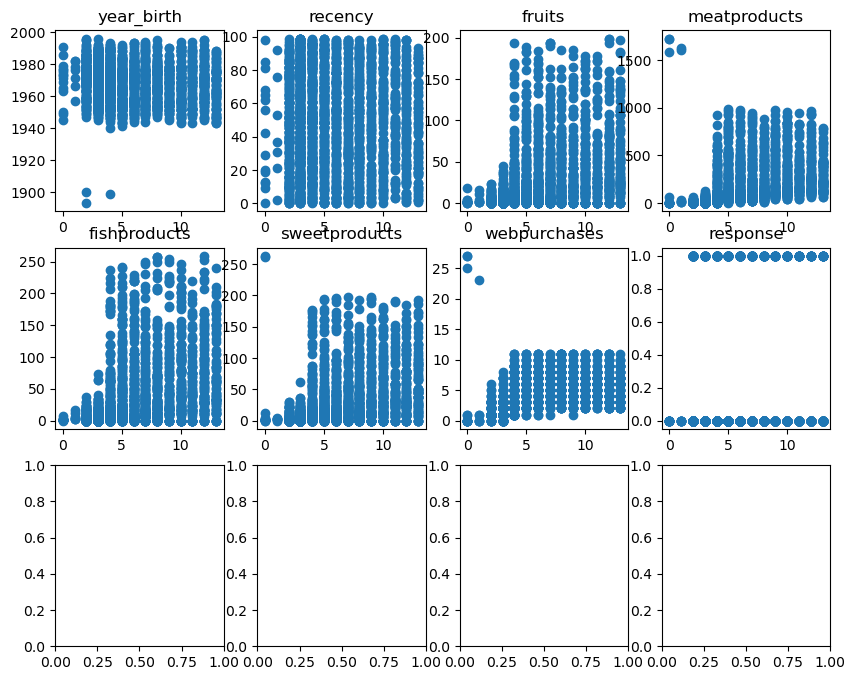

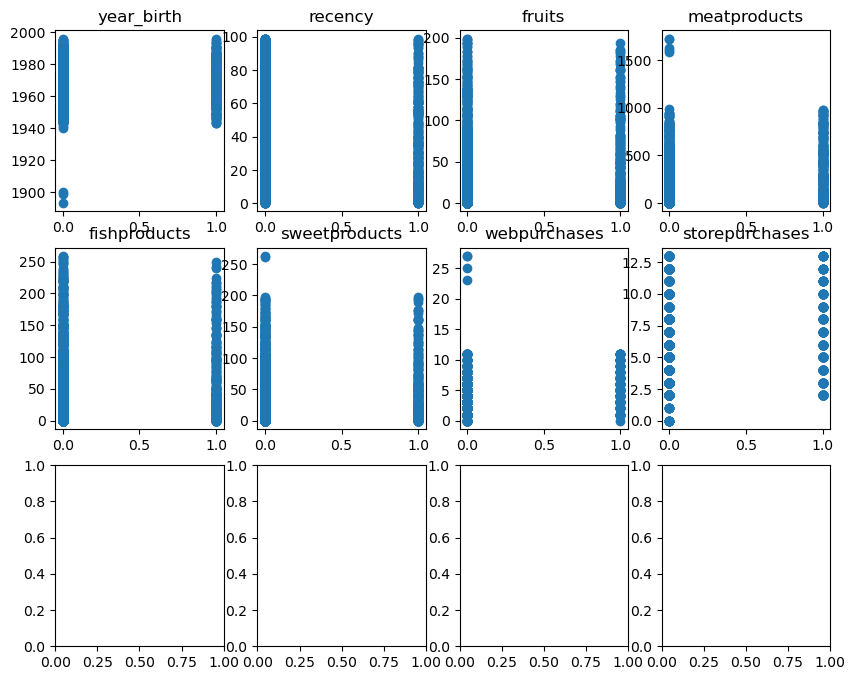

In [44]:
for col_main in df.columns:
    num_cols = []
    for col in df.columns:
        if col == col_main:
            continue
        else:
            num_cols.append(col)
            
    ax = plt.subplots(3, (len(df.columns) // 3 + 1), figsize=(10,8), )[1]
    i = 0
    k = 0
    counter = 0
    for col in num_cols:
        if  col == 'dt_customer':
            continue
        if counter == 4:
            i +=1
            counter = 0
            k = 0
        ax[i][k].scatter(df[col_main], df[col])
        ax[i][k].set_title(f'{col}')#, rotation=30)
        k += 1
        counter += 1

In [45]:
# ничего не понятно, зависимости не просматриваются. не факт, но, возможно, 
# если убрать выбросы - может появится наводка на количество кластеров

In [29]:
for col in df.drop('dt_customer', axis=1):
    df[col] = df[col].apply(lambda x: bounds[col][0] if x < bounds[col][0] else ( bounds[col][1] if x > bounds[col][1] else x))

In [80]:
customer_prefs = dict()
for customer in df['id']:
#     print(customer)
    web = df.loc[df.id == customer, 'webpurchases'].unique()[0]
    store = df.loc[df.id == customer, 'storepurchases'].unique()[0]
    pref = 'store' if web < store else ('web' if web > store else 'neutral')
    rel =  web /( web + store) - store / ( web + store) if pref == 'web' else (store /( web + store) - web / ( web + store) if pref == 'store' else 0)
    
    
    
    customer_prefs[customer] = (  pref  ,  rel)

In [84]:
store_sum = 0
web_sum = 0
neutral_sum = 0
for key in customer_prefs.keys():
    if customer_prefs[key][0] == 'store':
        store_sum += customer_prefs[key][1]
    elif customer_prefs[key][0] == 'web':
        web_sum += customer_prefs[key][1]
    elif customer_prefs[key][0] == 'neutral':
        neutral_sum += customer_prefs[key][1]
customer_prefs_sum = (
    ('store', store_sum),
    ('web', web_sum),
    ('neutral', neutral_sum),
)
customer_prefs_sum

(('store', 531.0132160801428), ('web', 71.34192078990868), ('neutral', 0))

In [87]:
df['customerpref'] = df.id.apply(lambda x: customer_prefs[x][0])

In [92]:
bounds = bounds_f(df.drop(['dt_customer', 'response', 'customerpref'], axis=1))
bounds

{'year_birth': (1932.0, 2004.0),
 'recency': (-51.0, 149.0),
 'fruits': (-47.0, 81.0),
 'meatproducts': (-308.0, 556.0),
 'fishproducts': (-67.5, 120.5),
 'sweetproducts': (-47.0, 81.0),
 'webpurchases': (-4.0, 12.0),
 'storepurchases': (-4.5, 15.5),
 'id': (-5571.0, 16827.0)}

In [93]:
for col in df.drop(['dt_customer', 'response', 'customerpref'], axis=1):
    df[col] = df[col].apply(lambda x: bounds[col][0] if x < bounds[col][0] else ( bounds[col][1] if x > bounds[col][1] else x))

In [99]:
df = df_reserve.copy()

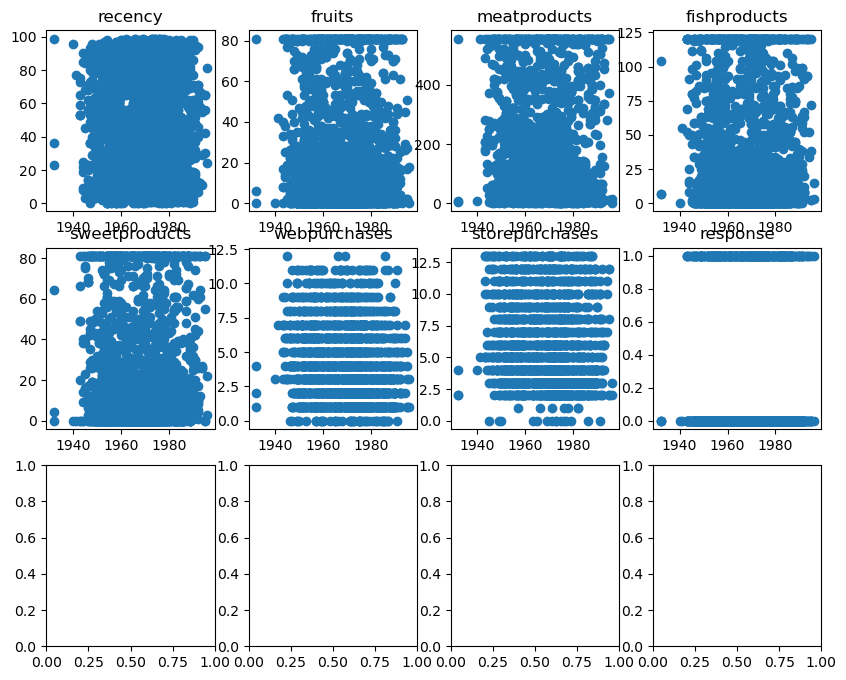

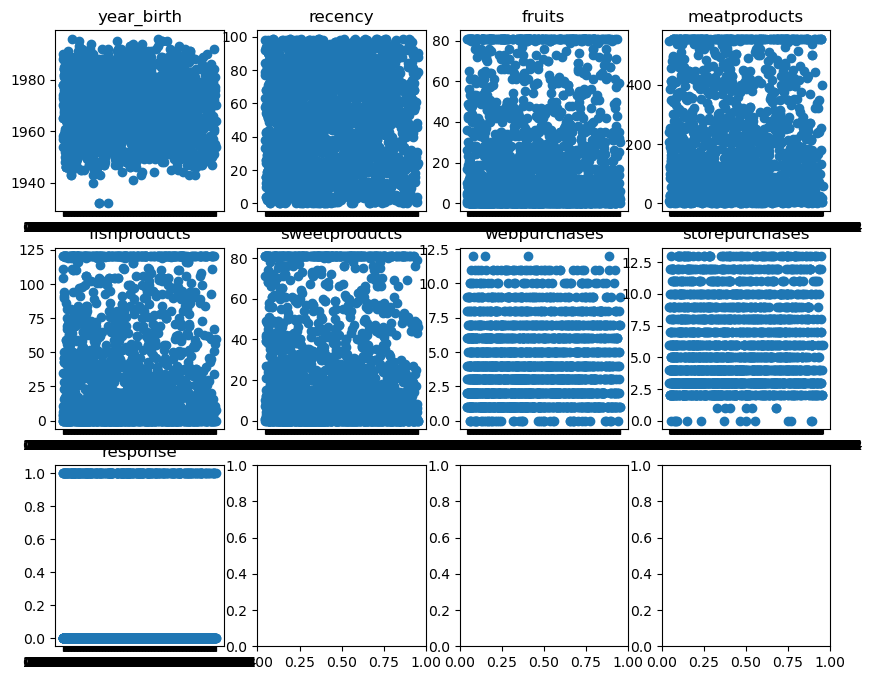

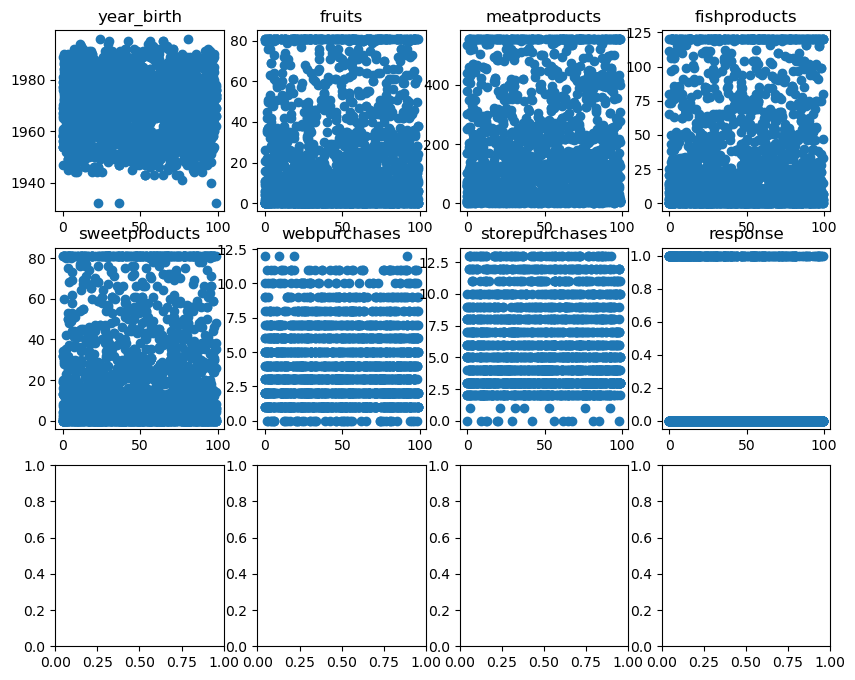

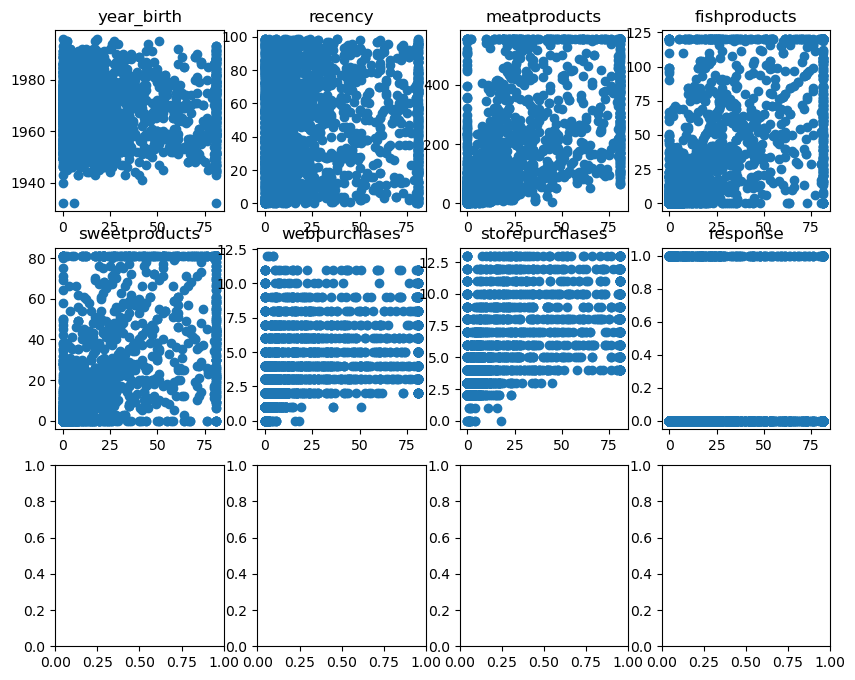

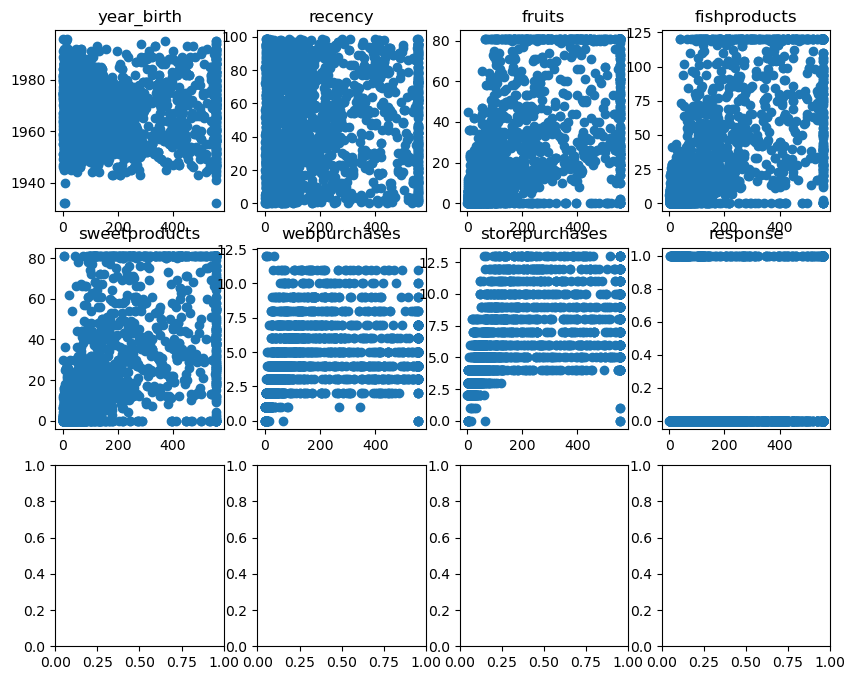

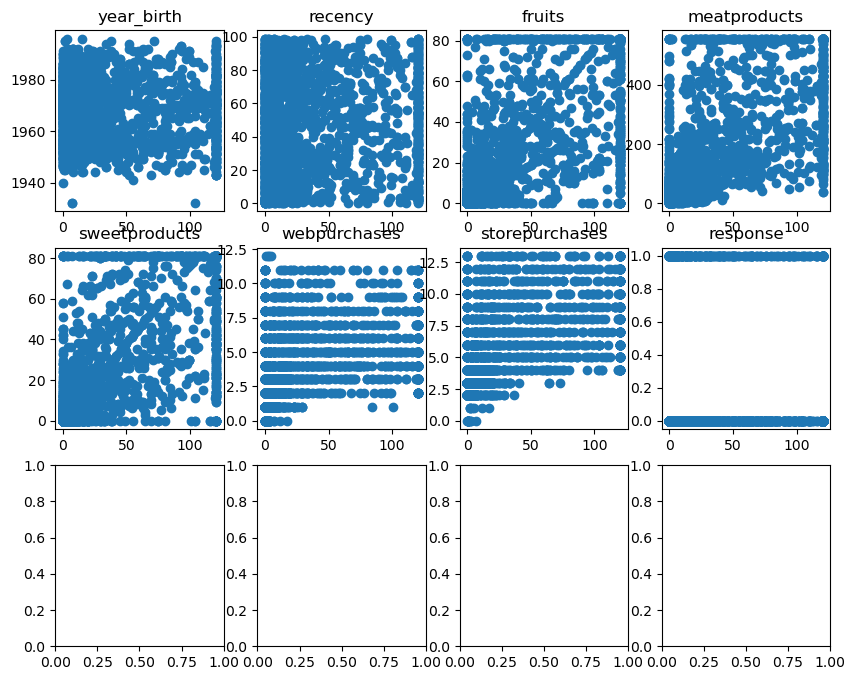

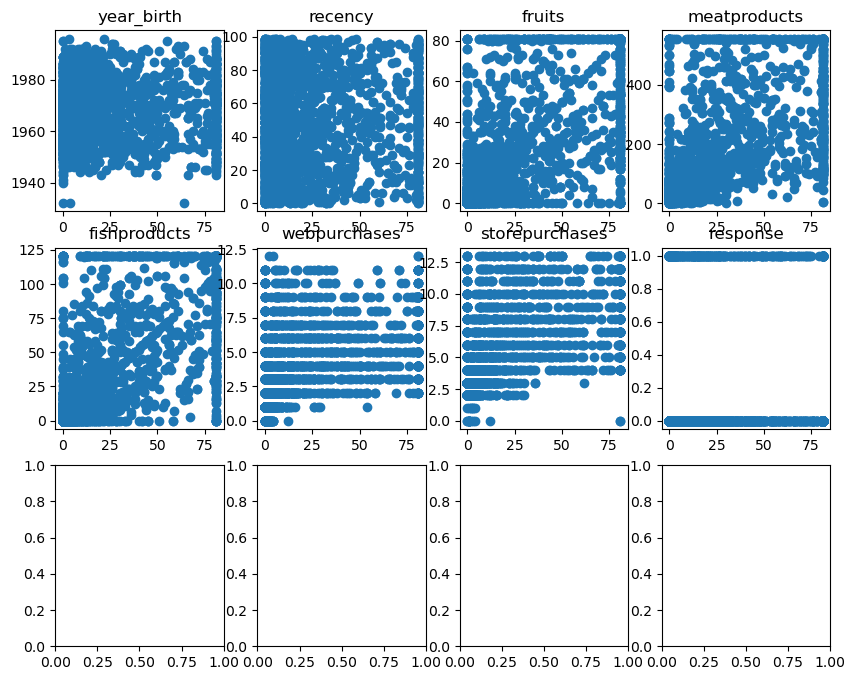

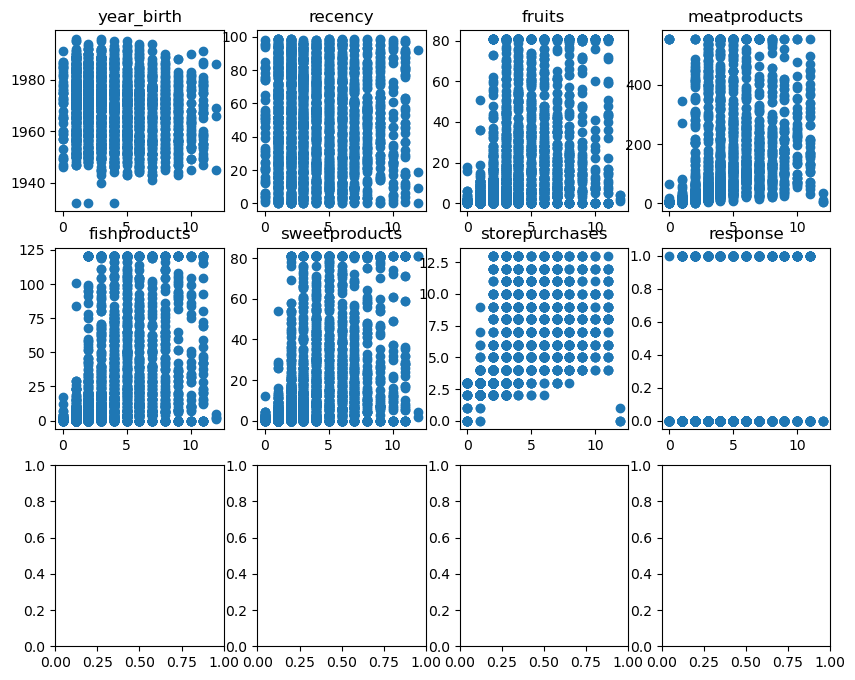

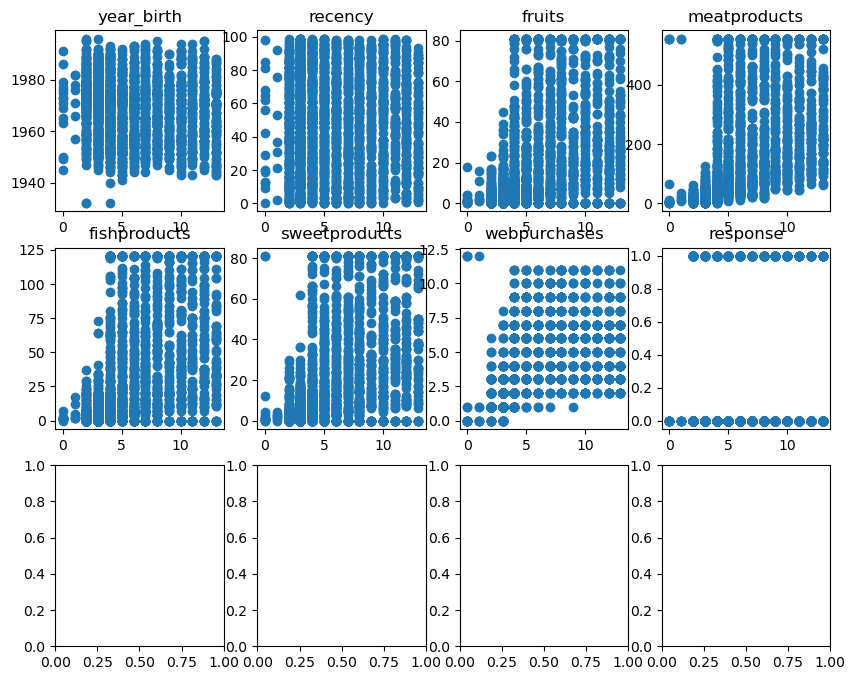

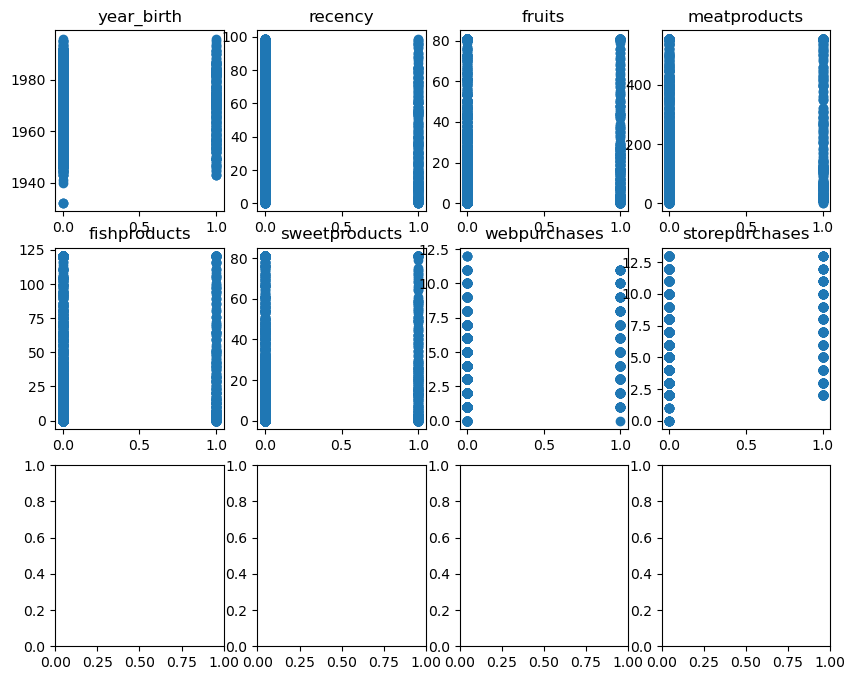

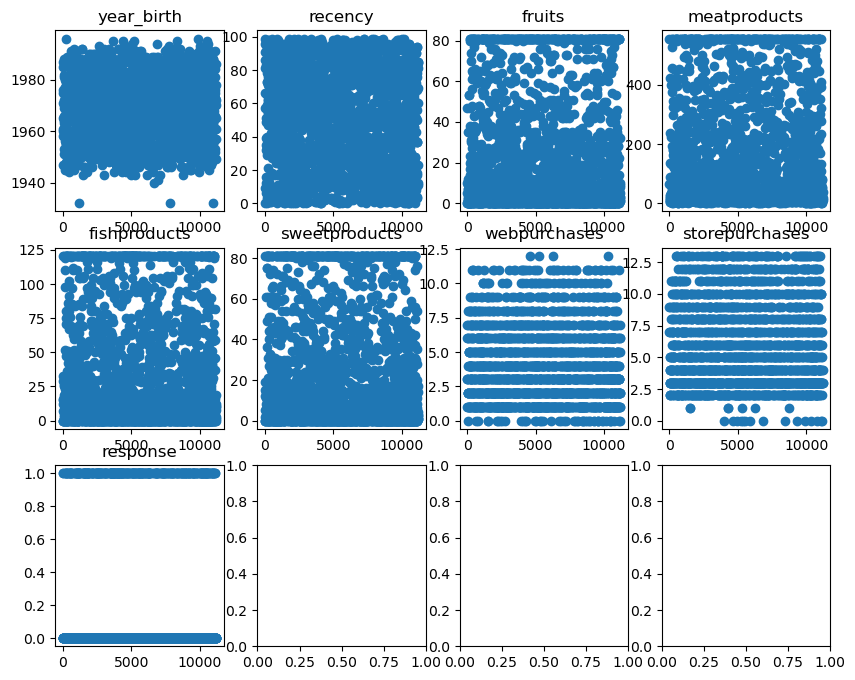

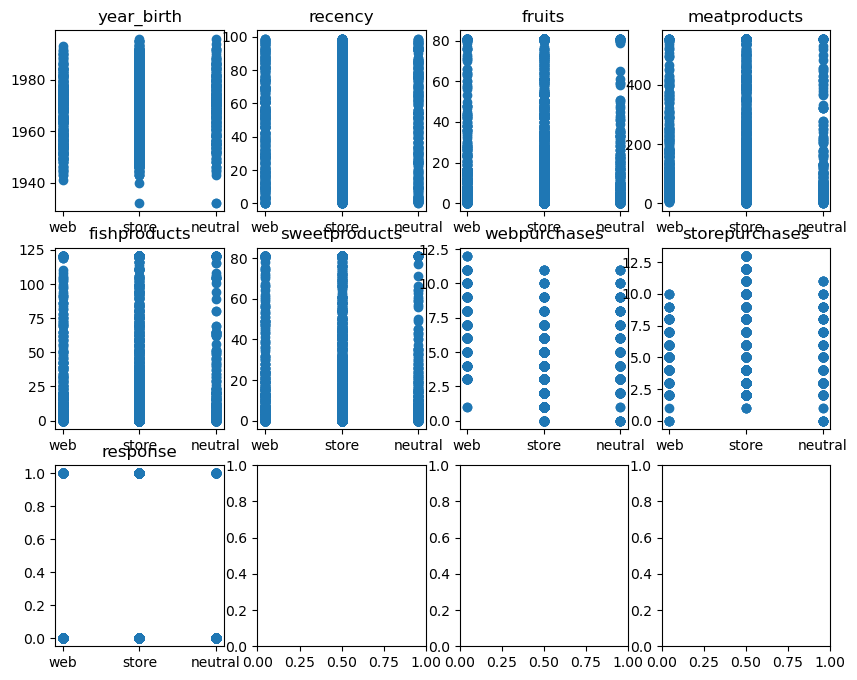

In [100]:
for col_main in df.columns:
    num_cols = []
    for col in df.columns:
        if col == col_main:
            continue
        else:
            num_cols.append(col)
            
    ax = plt.subplots(3, (len(df.columns) // 3 ), figsize=(10,8), )[1]
    i = 0
    k = 0
    counter = 0
    for col in num_cols:
        if  col in  ['dt_customer', 'customerpref', 'id']:
            continue
        if counter == 4:
            i +=1
            counter = 0
            k = 0
        ax[i][k].scatter(df[col_main], df[col])
        ax[i][k].set_title(f'{col}')#, rotation=30)
        k += 1
        counter += 1

In [ ]:
# ну... как говорится, либо лыжи не едут, либо я что то неправильно делаю:) не вижу наводок на количество кластеров в упор(
# зайдем с другой стороны - описание задания намекает что перебор+локоть/силуэт использовать нельзя, 
# по этому попробуем уменьшить выборку, опробуем вышеуказанный метод на ней и для верности прокрутим раз, этак 20


# Задание 2

Метод k-средних требует явно задать количество кластеров, на которые будут разбиваться данные. Данных может быть так много, что построение одной модели будет занимать несколько часов, поэтому важно заранее примерно представлять количество кластеров до запуска обучения модели.

На основе проведённого разведочного анализа данных предположите, какое количество кластеров будет оптимальным, аргументируйте своё предположение.

Напишите ваш ответ ниже


# Задание 3

Выполните очистку и подготовку данных для дальнейшего использования при построении моделей машинного обучения. Аргументируйте выбранные шаги подготовки данных. 

# Задание 4

Постройте модель кластеризации с помощью метода k-средних. Определите оптимальное количество кластеров с помощью метода локтя и метрики silhouette score. 

Помните, что аналитический способ определения количества кластеров не является единственно верным. Если ваше понимание предметной области и результаты анализа данных расходятся с результатами метода локтя, вы можете выбрать и обосновать количество кластеров, исходя из своего опыта.

In [89]:
df.customerpref.value_counts()

customerpref
store      1563
web         370
neutral     307
Name: count, dtype: int64

# Задание 5

Визуализируйте результаты кластеризации на двумерном графике с помощью метода t-SNE. Обоснуйте выбранные значения его гиперпараметров.

# Задание 6

Постройте профили кластеров и опишите их.

# Задание 7

Визуализируйте профили кластеров. Подготовьте краткое резюме результатов вашего исследования для заказчика.

## Как отправить работу на проверку

Скачайте файл с заданием в материалах, откройте его через Jupyter Notebook и выполните задания. Сохраните изменения при помощи опции Save and Checkpoint из вкладки меню File или кнопки Save and Checkpoint на панели инструментов. Отправьте через форму ниже итоговый файл Jupyter Notebook (.ipynb) или ссылку на него.